In [ ]:
# Installing the library
#!pip install sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from keras.optimizers import SGD, Adam

In [ ]:
train_data= pd.read_csv(f"/employee_train.csv")
test_data= pd.read_csv(f"/employee_test.csv")
train_data= pd.DataFrame(train_data)
test_data= pd.DataFrame(test_data)

Summary of the data


In [ ]:
#Information finding the datatype of the data
print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48660 entries, 0 to 48659
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   employee_id           48660 non-null  int64 
 1   department            48660 non-null  object
 2   region                48660 non-null  object
 3   education             48660 non-null  object
 4   gender                48660 non-null  object
 5   recruitment_channel   48660 non-null  object
 6   no_of_trainings       48660 non-null  int64 
 7   age                   48660 non-null  int64 
 8   previous_year_rating  48660 non-null  int64 
 9   length_of_service     48660 non-null  int64 
 10  awards_won?           48660 non-null  int64 
 11  avg_training_score    48660 non-null  int64 
 12  is_promoted           48660 non-null  int64 
dtypes: int64(8), object(5)
memory usage: 4.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20819 entries, 0 to 20818
Data colum

EDA

<ipython-input-4-9301b407b0f1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_promoted', data=train_data, palette="Blues")
<ipython-input-4-9301b407b0f1>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='recruitment_channel', data=train_data, palette="Oranges")
<ipython-input-4-9301b407b0f1>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=train_data, palette="Purples")
<ipython-input-4-9301b407b0f1>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0.

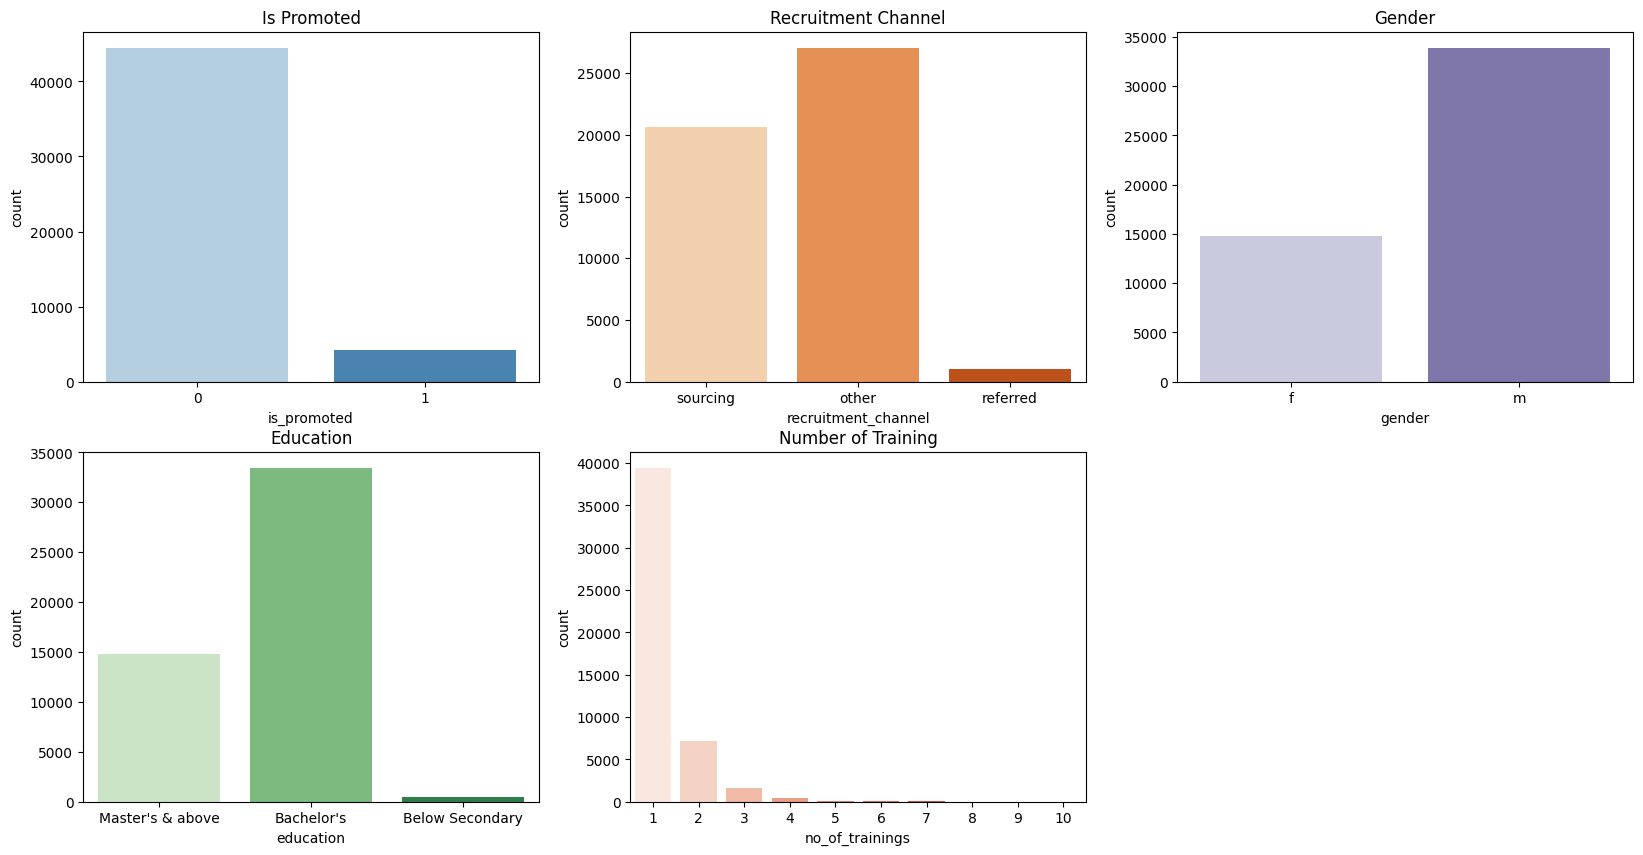

In [ ]:
#Graph for all indivadual variables

plt.figure(figsize=(20,10))

plt.subplot(231)
sns.countplot(x='is_promoted', data=train_data, palette="Blues")
plt.title("Is Promoted")

plt.subplot(232)
sns.countplot(x='recruitment_channel', data=train_data, palette="Oranges")
plt.title("Recruitment Channel")

plt.subplot(233)
sns.countplot(x='gender', data=train_data, palette="Purples")
plt.title("Gender")

plt.subplot(234)
sns.countplot(x='education', data=train_data, palette="Greens")
plt.title("Education")

plt.subplot(235)
sns.countplot(x='no_of_trainings', data=train_data, palette="Reds")
plt.title("Number of Training")

plt.show()

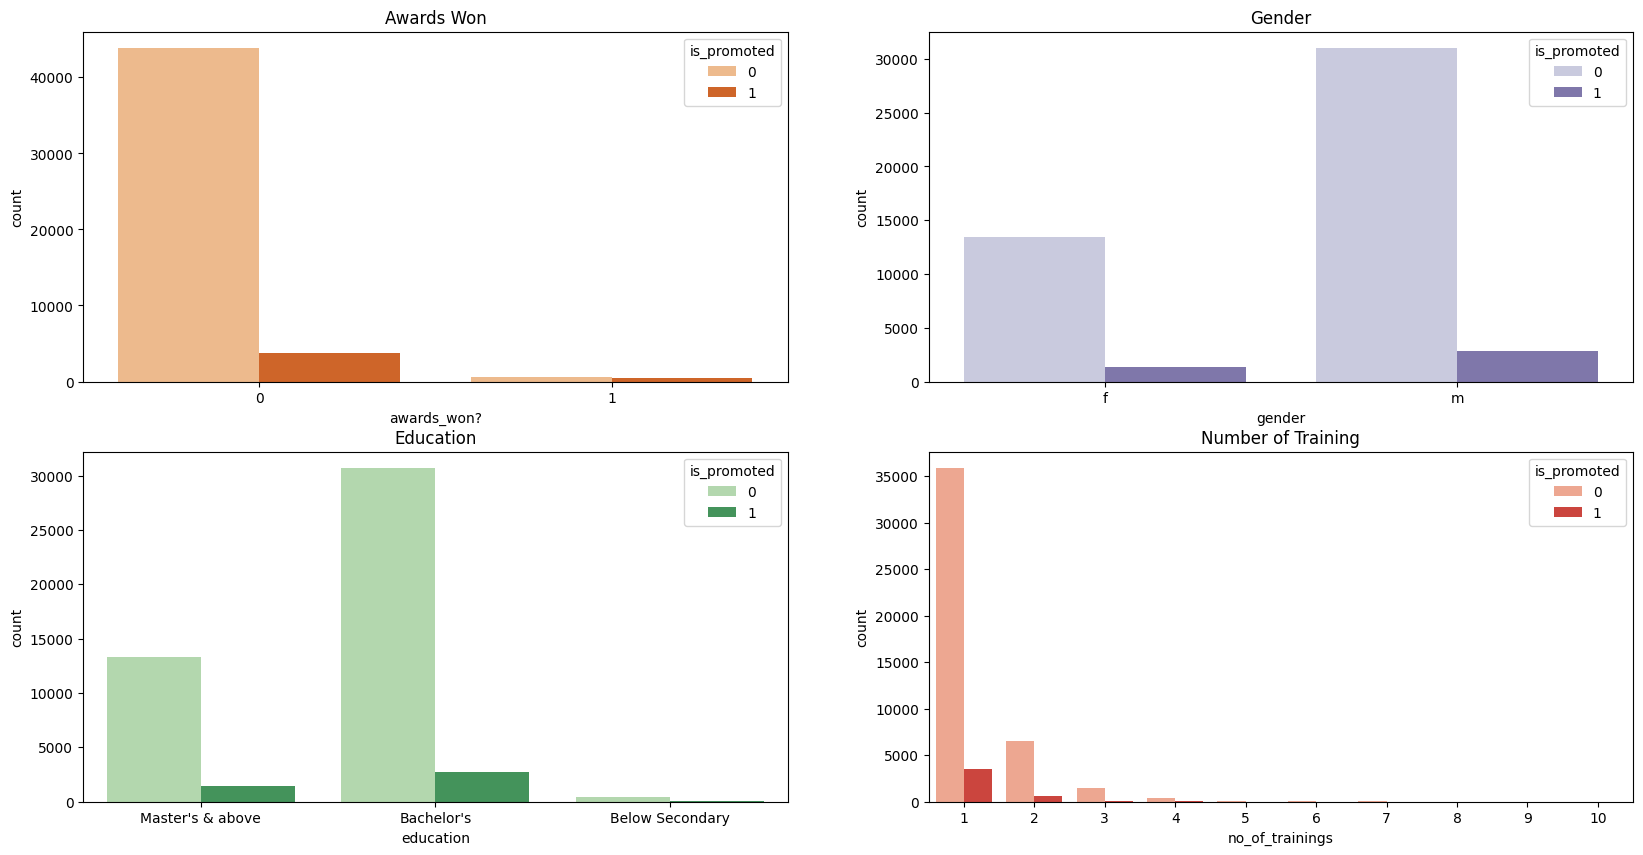

In [ ]:
#Graph of variables with respect to promoted data

plt.figure(figsize=(20,10))

plt.subplot(221)
sns.countplot(x='awards_won?', data=train_data, palette="Oranges", hue= 'is_promoted')
plt.title("Awards Won")

plt.subplot(222)
sns.countplot(x='gender', data=train_data, palette="Purples", hue= 'is_promoted')
plt.title("Gender")

plt.subplot(223)
sns.countplot(x='education', data=train_data, palette="Greens", hue= 'is_promoted')
plt.title("Education")

plt.subplot(224)
sns.countplot(x='no_of_trainings', data=train_data, palette="Reds", hue= 'is_promoted')
plt.title("Number of Training")

plt.show()

<ipython-input-6-2dd32cdaab05>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns. countplot(x='department', data= train_data, palette= 'terrain')


<Axes: xlabel='department', ylabel='count'>

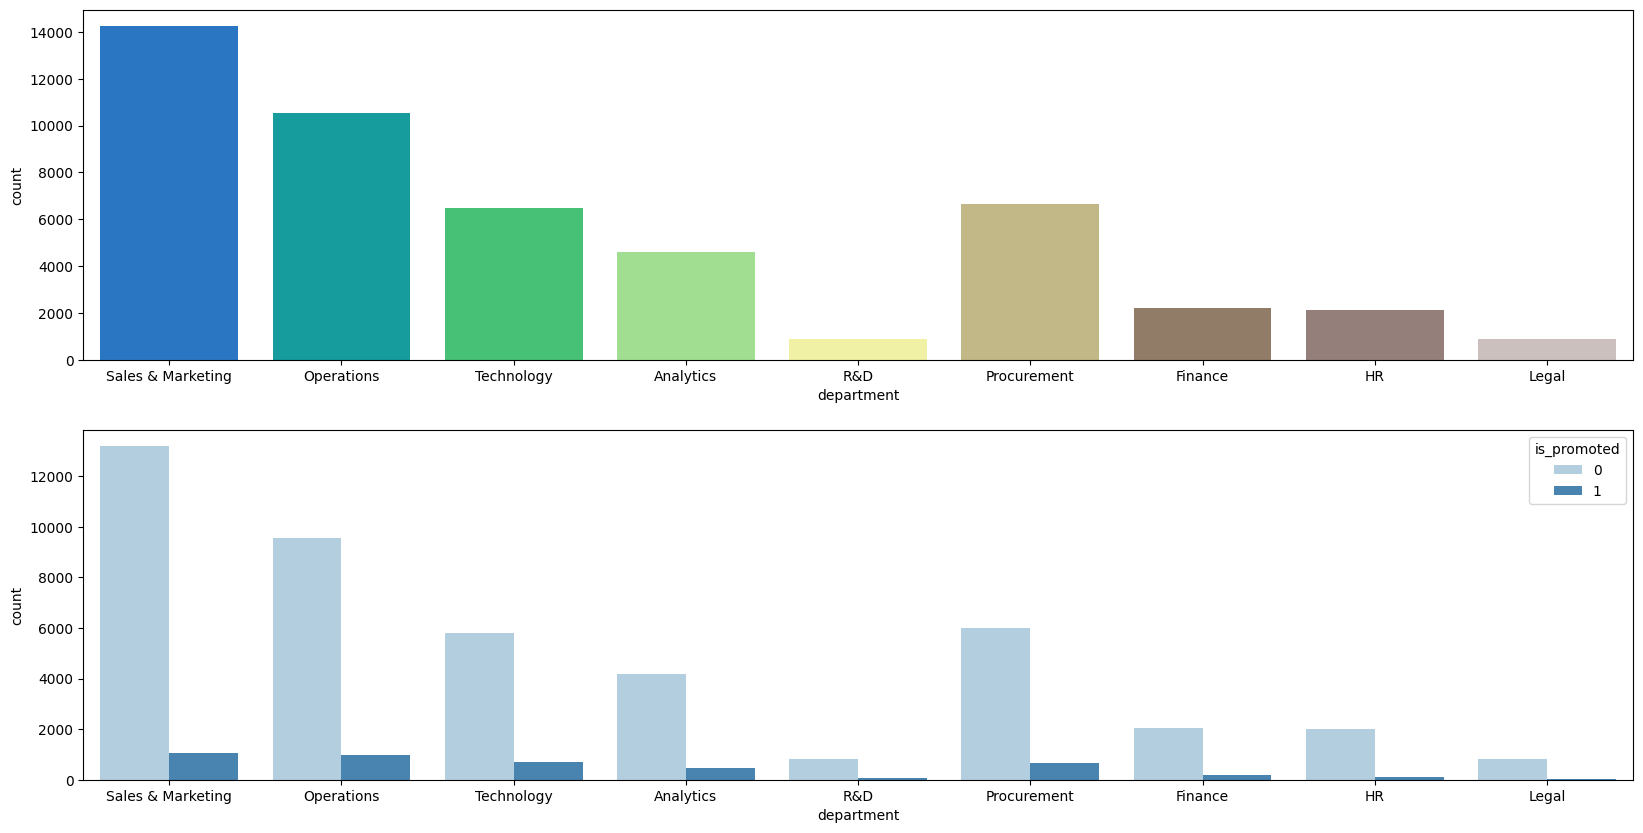

In [ ]:
# Total no employee working in each dept
plt.figure(figsize=(20,10))

plt.subplot(211)
sns. countplot(x='department', data= train_data, palette= 'terrain')

plt.subplot(212)
sns. countplot(x='department', data= train_data, palette= 'Blues', hue= 'is_promoted')

In [ ]:
col= ['department','region','education','gender', 'recruitment_channel','no_of_trainings', 'age','previous_year_rating', 'length_of_service', 'awards_won?',
 'avg_training_score']
train_data_x= train_data[col]
train_data_y= train_data['is_promoted']

In [ ]:
train_data_x.shape

(48660, 11)

Neural Network

In [ ]:
#Transforming the data from categorical to ordinal
le= LabelEncoder()
train_data_x['gender']= le.fit_transform(train_data_x['gender'])
train_data_x['department']= le.fit_transform(train_data_x['department'])
train_data_x['region']= le.fit_transform(train_data_x['region'])
train_data_x['recruitment_channel']= le.fit_transform(train_data_x['recruitment_channel'])
train_data_x['education']= le.fit_transform(train_data_x['education'])

<ipython-input-9-4f6abaf2031a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_x['gender']= le.fit_transform(train_data_x['gender'])
<ipython-input-9-4f6abaf2031a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_x['department']= le.fit_transform(train_data_x['department'])
<ipython-input-9-4f6abaf2031a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [ ]:
print("Dept", train_data_x['department'].unique())
print("region", train_data_x['region'].unique())
print("Education", train_data_x['education'].unique())
print("Recritment", train_data_x['recruitment_channel'].unique())

Dept [7 4 8 0 6 5 1 2 3]
region [31 14 10 15 18 11 12 27  0 28 21 24  6  5  2 29 20  8  4  7 17  1 19 23
  3 13 25 30 26 32 16 22 33  9]
Education [2 0 1]
Recritment [2 0 1]


In [ ]:
#Transforming the data from categorical to ordinal
le= LabelEncoder()
test_data['gender']= le.fit_transform(test_data['gender'])
test_data['department']= le.fit_transform(test_data['department'])
test_data['region']= le.fit_transform(test_data['region'])
test_data['recruitment_channel']= le.fit_transform(test_data['recruitment_channel'])
test_data['education']= le.fit_transform(test_data['education'])

In [ ]:
test_data= test_data[col]
test_data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,2,28,0,0,0,1,31,3,5,0,51
1,7,4,0,1,0,1,31,1,4,0,47
2,5,11,0,0,0,3,31,2,9,0,65
3,1,21,0,1,2,1,30,4,7,0,61
4,5,31,0,1,2,1,36,3,2,0,68


In [ ]:
#splitting the data
x_train, x_test, y_train, y_test= train_test_split(train_data_x,train_data_y, test_size= 0.3, random_state=42)

In [ ]:
#Model training

model= Sequential()
model.add(Dense(8, input_shape=(11,), activation= 'relu'))
model.add(Dropout(0.3))
#model.add(Dense(3, activation= 'relu'))
#model.add(Dropout(0.2))
model.add(Dense(1, activation= 'sigmoid'))

#sgd_opt= SGD(learning_rate= 0.001)
adam= Adam(learning_rate= 0.001)
model.compile(optimizer= adam, loss= 'binary_crossentropy', metrics= ['accuracy'])


In [ ]:
model.fit(x_train, y_train, epochs= 60, batch_size=1000, validation_data= (x_test, y_test))

ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 34062
'y' sizes: 38928


In [ ]:
test_data= pd.DataFrame(test_data)
test_data


,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,2,28,0,0,0,1,31,3,5,0,51
1,7,4,0,1,0,1,31,1,4,0,47
2,5,11,0,0,0,3,31,2,9,0,65
3,1,21,0,1,2,1,30,4,7,0,61
4,5,31,0,1,2,1,36,3,2,0,68
...,...,...,...,...,...,...,...,...,...,...,...
20814,7,12,0,1,0,1,28,4,2,0,51
20815,3,11,1,1,2,1,24,3,1,0,61
20816,8,17,0,1,2,1,31,3,7,0,74
20817,2,7,0,0,2,1,26,4,4,0,50


In [ ]:
pred= model.predict(test_data)
predictions = (pred > 0.5).astype(int)
predictions

651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

<Axes: ylabel='count'>

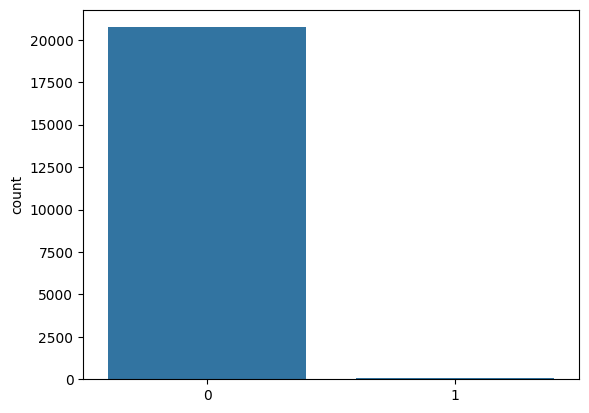

In [ ]:
sns.countplot(x=predictions.flatten())

In [ ]:
# Assume you have the following variable names for your features
feature_names = [f'Feature_{i}' for i in range(1, 12)]  # Update according to your feature names

# Initialize a dictionary to store maximum weights with their feature names
max_weights_dict = {}

# Get the weights of the first layer
first_layer_weights = model.layers[0].get_weights()
if first_layer_weights:  # Check if the layer has weights
    weight_matrix = first_layer_weights[0]  # Get the weight matrix

    # Find the maximum weight for each feature (input variable)
    for i in range(weight_matrix.shape[0]):  # Iterate over each input feature
        max_weight = np.max(weight_matrix[i, :])  # Find max weight for this input feature
        max_weights_dict[feature_names[i]] = max_weight  # Store in dictionary

# Print maximum weights with variable names
for feature, max_weight in max_weights_dict.items():
    print(f"Variable: {feature}, Max Weight: {max_weight}")


Variable: Feature_1, Max Weight: 0.4464132785797119
Variable: Feature_2, Max Weight: 0.16868998110294342
Variable: Feature_3, Max Weight: 0.34614041447639465
Variable: Feature_4, Max Weight: 0.4516063928604126
Variable: Feature_5, Max Weight: 0.5484611392021179
Variable: Feature_6, Max Weight: 1.0494053363800049
Variable: Feature_7, Max Weight: 0.41431188583374023
Variable: Feature_8, Max Weight: 0.3936839699745178
Variable: Feature_9, Max Weight: 0.09866318851709366
Variable: Feature_10, Max Weight: 0.2818511724472046
Variable: Feature_11, Max Weight: 0.08845438063144684


**-----------------------NEW REVISED CODE----------------------------------**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt


data = pd.read_csv(f"/content/employee_train.csv")


# Separate features and target variable
X = data.drop(columns=['is_promoted', 'employee_id'])  # Features
y = data['is_promoted']  # Target variable

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Scale numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# No need to one-hot encode the target variable for binary classification
#label_encoder = LabelEncoder()
#y = label_encoder.fit_transform(y)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


974/974 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8577 - loss: 0.4007 - val_accuracy: 0.9147 - val_loss: 0.2624
Epoch 2/20
974/974 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9129 - loss: 0.2836 - val_accuracy: 0.9175 - val_loss: 0.2555
Epoch 3/20
974/974 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9161 - loss: 0.2664 - val_accuracy: 0.9192 - val_loss: 0.2521
Epoch 4/20
974/974 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9139 - loss: 0.2672 - val_accuracy: 0.9229 - val_loss: 0.2442
Epoch 5/20
974/974 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9183 - loss: 0.2561 - val_accuracy: 0.9265 - val_loss: 0.2373
Epoch 6/20
974/974 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9256 - loss: 0.2407 - val_accuracy: 0.9306 - val_loss: 0.2285
Epoch 7/20
974/974 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9298 - loss: 0.2295 - val_accuracy: 0.9363 - val_loss: 0.2203
Epoch 8/20
974/974 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9325 - loss: 0.2246 - val_accuracy: 0.9382 - val_

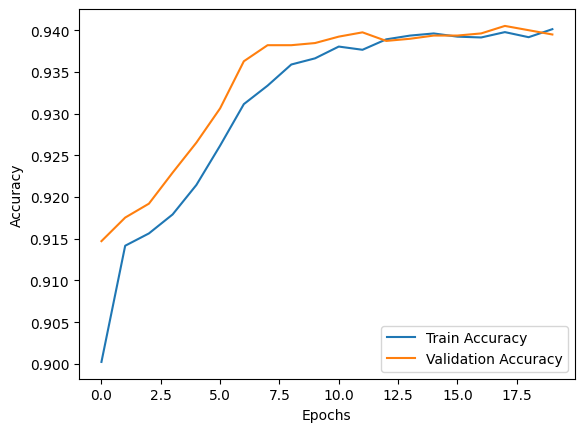

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Model building
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Single output for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Train
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Load the test data
test_data = pd.read_csv(f"/content/employee_test.csv")

test_data= test_data.drop(columns=['employee_id'])

# Preprocess the test data
# Encode categorical variables
test_data_encoded = pd.get_dummies(test_data, drop_first=True)

# Scale the features (use the same scaler fitted on training data)
scaler = StandardScaler()
test_data_scaled = scaler.fit_transform(test_data_encoded)

In [ ]:
test_data.shape

(20819, 11)

In [ ]:
pred= model.predict(test_data_scaled)
predictions = (pred > 0.5).astype(int)

651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<Axes: ylabel='count'>

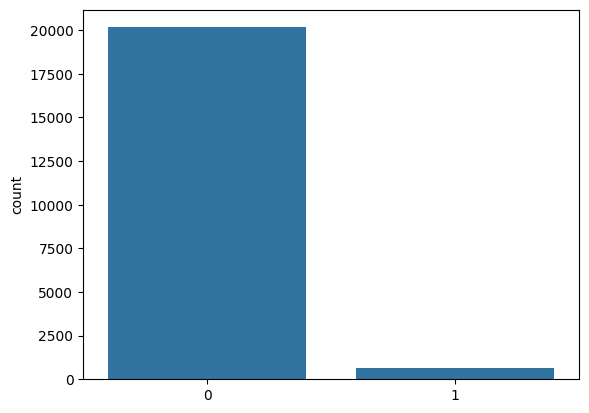

In [ ]:
import seaborn as sns
sns.countplot(x=predictions.flatten())

In [ ]:
c=0
for i in predictions:
  if i==1:
    c+=1
c

653

In [ ]:

first_layer_weights = model.layers[0].get_weights()[0]  # Get weights of the first layer (ignoring biases)
feature_importance = np.mean(np.abs(first_layer_weights), axis=1)  # Mean absolute weight per feature

# Display feature importance
feature_names = pd.get_dummies(data.drop(columns=['is_promoted']), drop_first=True).columns
feature_importance_dict = dict(zip(feature_names, feature_importance))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

print("Feature Importances:")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance:.4f}")


Feature Importances:
awards_won?: 0.4581
department_R&D: 0.3682
department_Legal: 0.2655
age: 0.2538
region_region_17: 0.1997
department_Operations: 0.1679
department_Finance: 0.1553
region_region_19: 0.1544
avg_training_score: 0.1492
department_Sales & Marketing: 0.1480
no_of_trainings: 0.1376
region_region_21: 0.1358
region_region_5: 0.1334
region_region_12: 0.1160
employee_id: 0.1137
department_Procurement: 0.1123
region_region_8: 0.1104
region_region_30: 0.1102
region_region_14: 0.1097
education_Master's & above: 0.1093
region_region_28: 0.1074
region_region_25: 0.1065
education_Below Secondary: 0.1035
department_HR: 0.1034
region_region_11: 0.1030
region_region_23: 0.0996
region_region_26: 0.0996
region_region_15: 0.0992
region_region_6: 0.0987
department_Technology: 0.0971
region_region_2: 0.0963
gender_m: 0.0955
region_region_32: 0.0928
region_region_18: 0.0922
region_region_22: 0.0912
length_of_service: 0.0891
region_region_10: 0.0891
region_region_33: 0.0865
region_region_20: 